In [21]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

np.random.seed(42)

n = 100

data = pd.DataFrame({
    'price': np.random.uniform(100, 500, size=n),
    'ad_budget': np.random.uniform(1000, 10000, size=n),
    'seasonality': np.random.choice([0.8, 1.0, 1.2], size=n),
})

data['demand'] = (
    3000
    - 15 * data['price']      
    + 0.5 * data['ad_budget']
    + 500 * data['seasonality']
    + np.random.normal(0, 150, size=n) 
)

X = data[['price', 'ad_budget', 'seasonality']]
y = data['demand']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"MSE: {mse:.2f}, R2: {r2:.2f}")


MSE: 27045.46, R2: 0.99


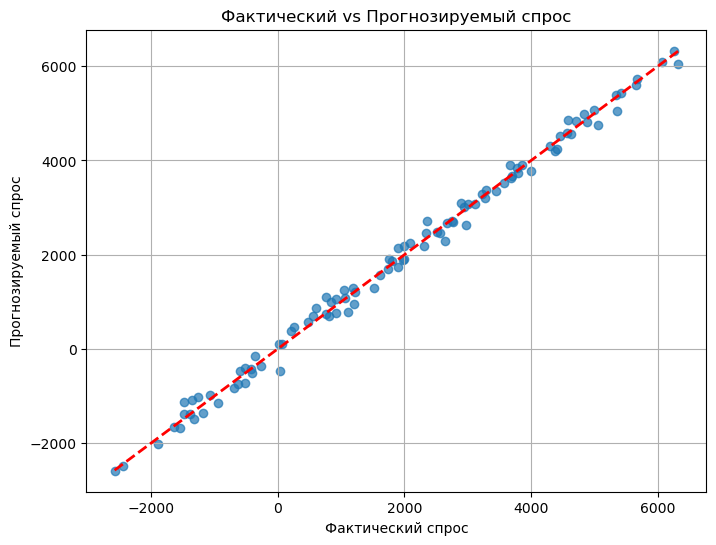

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Фактический спрос")
plt.ylabel("Прогнозируемый спрос")
plt.title("Фактический vs Прогнозируемый спрос")
plt.grid(True)
plt.show()

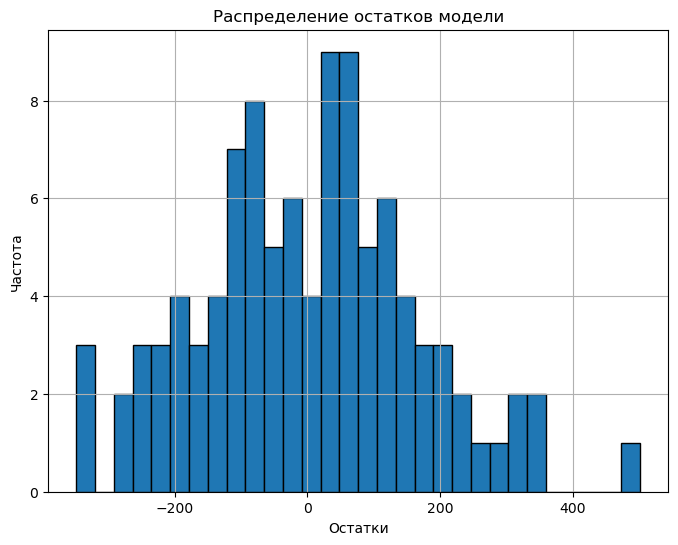

In [23]:
residuals = y - y_pred
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor='black')
plt.title("Распределение остатков модели")
plt.xlabel("Остатки")
plt.ylabel("Частота")
plt.grid(True)
plt.show()

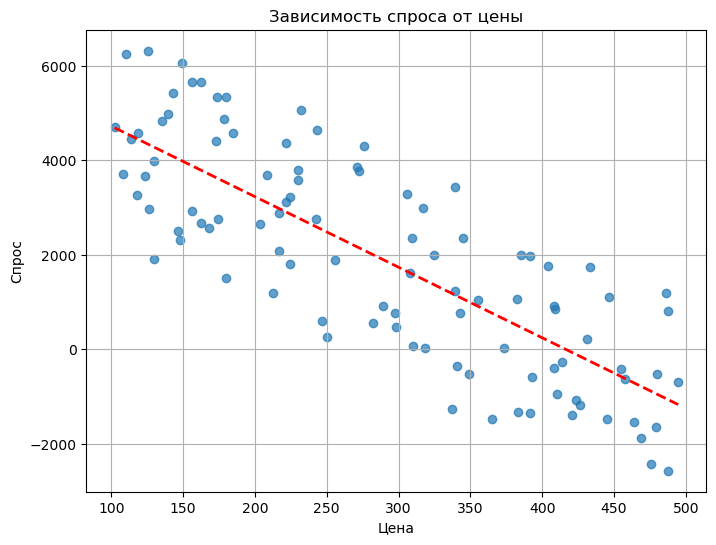

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(data['price'], data['demand'], alpha=0.7)
price_range = np.linspace(data['price'].min(), data['price'].max(), 100).reshape(-1, 1)
trend_price = model.intercept_ + model.coef_[0] * price_range + \
              model.coef_[1] * data['ad_budget'].mean() + \
              model.coef_[2] * data['seasonality'].mean()
plt.plot(price_range, trend_price, 'r--', lw=2)
plt.xlabel("Цена")
plt.ylabel("Спрос")
plt.title("Зависимость спроса от цены")
plt.grid(True)
plt.show()

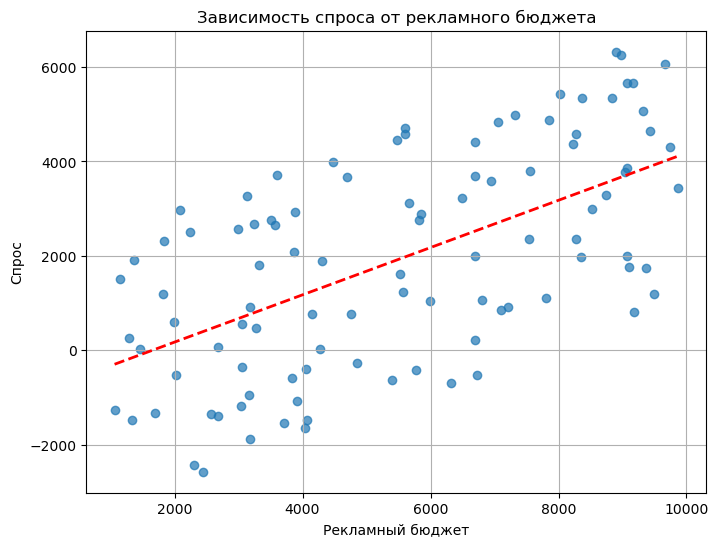

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(data['ad_budget'], data['demand'], alpha=0.7)
ad_range = np.linspace(data['ad_budget'].min(), data['ad_budget'].max(), 100).reshape(-1, 1)
trend_ad = model.intercept_ + model.coef_[0] * data['price'].mean() + \
           model.coef_[1] * ad_range + \
           model.coef_[2] * data['seasonality'].mean()
plt.plot(ad_range, trend_ad, 'r--', lw=2)
plt.xlabel("Рекламный бюджет")
plt.ylabel("Спрос")
plt.title("Зависимость спроса от рекламного бюджета")
plt.grid(True)
plt.show()